# Preperaing The Metrics

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
import os
import numpy as np
from skimage.color import rgb2gray
from skimage import io
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
import pandas as pd
from itertools import product, combinations
import sys
import time

# imgset Creation

In [ ]:
dirs = list(os.walk('training\\'))[1:]
data = np.zeros((1,32,32))
for i in dirs:
    for filename in i[2]:
        img = io.imread(os.path.join(i[0],filename))
        print(os.path.join(i[0],filename))
        img = rgb2gray(img)
        img = img.copy()
        img.resize((1,32,32))
        data = np.concatenate((data,img),axis=0)
        print(data.shape)



training\canvas1\canvas1-a-p001.png
(2, 32, 32)
training\canvas1\canvas1-a-p002.png
(3, 32, 32)
training\canvas1\canvas1-a-p003.png
(4, 32, 32)
training\canvas1\canvas1-a-p004.png
(5, 32, 32)
training\canvas1\canvas1-a-p005.png
(6, 32, 32)
training\canvas1\canvas1-a-p006.png
(7, 32, 32)
training\canvas1\canvas1-a-p007.png
(8, 32, 32)
training\canvas1\canvas1-a-p008.png
(9, 32, 32)
training\canvas1\canvas1-a-p009.png
(10, 32, 32)
training\canvas1\canvas1-a-p010.png
(11, 32, 32)
training\canvas1\canvas1-a-p011.png
(12, 32, 32)
training\canvas1\canvas1-a-p012.png
(13, 32, 32)
training\canvas1\canvas1-a-p013.png
(14, 32, 32)
training\canvas1\canvas1-a-p014.png
(15, 32, 32)
training\canvas1\canvas1-a-p015.png
(16, 32, 32)
training\canvas1\canvas1-a-p016.png
(17, 32, 32)
training\canvas1\canvas1-a-p017.png
(18, 32, 32)
training\canvas1\canvas1-a-p018.png
(19, 32, 32)
training\canvas1\canvas1-a-p019.png
(20, 32, 32)
training\canvas1\canvas1-a-p020.png
(21, 32, 32)
training\canvas1\canvas1-a-p

In [ ]:
data = data[1:]

In [ ]:
data.shape

(180, 32, 32)

# Preparing Dataset


In [ ]:
canvas = data[:30]
cushion = data[30:60]
linsseeds = data[60:90]
sand = data[90:120]
seat = data[120:150]
stone = data[150:]
stone.shape

(30, 32, 32)

In [ ]:
def make_combine(dataset):
    arr = np.zeros((1,2,32,32))
    for img1,img2 in combinations(dataset,2):
        temp = np.concatenate((img1,img2),axis=0)
        temp = temp.reshape((1,2,32,32))
        arr = np.concatenate((arr,temp))

    arr = arr[1:,:,:,:]
    return arr.copy()

stone_stone_x = make_combine(stone)
canvas_canvas_x = make_combine(canvas)
cushion_cushion_x = make_combine(cushion)
linsseeds_linsseeds_x = make_combine(linsseeds)
sand_sand_x = make_combine(sand)
seat_seat_x = make_combine(seat)
print(seat_seat_x.shape)


(435, 2, 32, 32)


In [ ]:
def make_product(dataset1,datset2):
    arr = np.zeros((1,2,32,32))
    for img1,img2 in product(dataset1,datset2):
        temp = np.concatenate((img1,img2),axis=0)
        temp = temp.reshape((1,2,32,32))
        arr = np.concatenate((arr,temp))

    arr = arr[1:,:,:,:]
    return arr.copy()
stone_canvas_x = make_product(stone,canvas)
stone_cushion_x = make_product(stone,cushion)
stone_linsseeds_x = make_product(stone,linsseeds)
stone_sand_x = make_product(stone,sand)
stone_seat_x = make_product(stone,seat)

canvas_sand_x = make_product(canvas,sand)
canvas_cushion_x = make_product(canvas,cushion)
canvas_linsseeds_x = make_product(canvas,linsseeds)
canvas_seat_x = make_product(canvas,seat)

cushion_linsseeds_x = make_product(cushion,linsseeds)
cushion_sand_x = make_product(cushion,sand)
cushion_seat_x = make_product(cushion,seat)

linsseeds_sand_x = make_product(linsseeds,sand)
linsseeds_seat_x = make_product(linsseeds,seat)

sand_seat_x = make_product(sand,seat)

print(stone_canvas_x.shape)

(900, 2, 32, 32)


In [ ]:
stone_canvas_y = np.zeros((stone_canvas_x.shape[0],))
stone_cushion_y = np.zeros((stone_cushion_x.shape[0],))
stone_linsseeds_y = np.zeros((stone_linsseeds_x.shape[0],))
stone_sand_y = np.zeros((stone_sand_x.shape[0],))
stone_seat_y = np.zeros((stone_seat_x.shape[0],))

canvas_sand_y = np.zeros((canvas_sand_x.shape[0],))
canvas_cushion_y = np.zeros((canvas_cushion_x.shape[0],))
canvas_linsseeds_y = np.zeros((canvas_linsseeds_x.shape[0],))
canvas_seat_y = np.zeros((canvas_seat_x.shape[0],))

cushion_linsseeds_y = np.zeros((cushion_linsseeds_x.shape[0],))
cushion_sand_y = np.zeros((cushion_sand_x.shape[0],))
cushion_seat_y = np.zeros((cushion_seat_x.shape[0],))

linsseeds_sand_y = np.zeros((linsseeds_sand_x.shape[0],))
linsseeds_seat_y = np.zeros((linsseeds_seat_x.shape[0],))

sand_seat_y = np.zeros((sand_seat_x.shape[0],))


In [ ]:
stone_stone_y = np.ones((stone_stone_x.shape[0],))
canvas_canvas_y = np.ones((canvas_canvas_x.shape[0],))
cushion_cushion_y = np.ones((cushion_cushion_x.shape[0],))
linsseeds_linsseeds_y = np.ones((linsseeds_linsseeds_x.shape[0],))
sand_sand_y = np.ones((sand_sand_x.shape[0],))
seat_seat_y = np.ones((seat_seat_x.shape[0],))

# Template Matching

In [ ]:
def get_thresh_cc(dataset1,normalize='n'):
    
    score = []
    for x in range(dataset1.shape[0]):
        ImageA = dataset1[x][0].copy()
        ImageB = dataset1[x][1].copy()
        #print(ImageA.shape)
        #print(ImageB.shape)
        if(normalize=='y'):
            ImageA = (ImageA-np.mean(ImageA))/np.std(ImageA)
            ImageB = (ImageB-np.mean(ImageB))/np.std(ImageB)

        score.append(np.sum([ImageA*ImageB]))
    
    return np.percentile(np.array(score),75)

def get_thresh_conv(dataset1,normalize='n'):
    
    score = []
    for x in range(dataset1.shape[0]):
        ImageA = dataset1[x][0].copy()
        ImageB = dataset1[x][1].copy()
        #print(ImageA.shape)
        #print(ImageB.shape)
        if(normalize=='y'):
            ImageA = (ImageA-np.mean(ImageA))/np.std(ImageA)
            ImageB = (ImageB-np.mean(ImageB))/np.std(ImageB)

        score.append(np.sum([np.flip(np.flip(ImageA,axis=0),axis=1)*ImageB]))
    
    return np.percentile(np.array(score),75)


def get_thresh_ssd(dataset1,normalize='n'):
    
    score = []
    for x in range(dataset1.shape[0]):
        ImageA = dataset1[x][0].copy()
        ImageB = dataset1[x][1].copy()
        #print(ImageA.shape)
        #print(ImageB.shape)
        if(normalize=='y'):
            ImageA = (ImageA-np.mean(ImageA))/np.std(ImageA)
            ImageB = (ImageB-np.mean(ImageB))/np.std(ImageB)

        score.append(np.sum(np.power((ImageA-ImageB),2)))
    
    return np.percentile(np.array(score),15)


def cross_cor(img1:np.array,img2:np.array,thresh):
    assert img1.size == img2.size
    score = np.sum([img1*img2])
    #print(f'score is {score}')
    #print(f'thresh is {thresh}')
    if(score>=thresh):
        return True
    else:
        return False

def conv(img1: np.array,img2: np.array,thresh):
    assert img1.size == img2.size

    img1 = np.flip(img1,axis=0)
    img1 = np.flip(img1,axis=1)
    score = np.sum([img1*img2])
    #print(f'score is {score}')
    #print(f'thresh is {thresh}')
    if(score>=thresh):
        return True
    else:
        return False

def sum_square(img1:np.array , img2:np.array,thresh):
    assert img1.size == img2.size
    score = np.sum(np.power((img1-img2),2))
    #print(f'score is {score}')
    #print(f'thresh is {thresh}')
    if(score<thresh):
        return True
    else:
        return False

def matchingImages(ImageA:np.array,ImageB:np.array,thresh: float,method='cc',normalize='n'):
    try:
        assert ImageA.size==ImageB.size
    except :
        print('Sizes are not equal')
        sys.exit(0)
    try:
        assert method in ['cc','conv','ssd']
    except :
        print('Method not detected')
        sys.exit(0)

    try:
        assert normalize in ['n','y']
    except :
        print(f'Normalize has invalid input {normalize}')
        sys.exit(0)

    if(normalize=='y'):
        ImageA = (ImageA-np.mean(ImageA))/np.std(ImageA)
        ImageB = (ImageB-np.mean(ImageB))/np.std(ImageB)
    
    if(method=='cc'):
        
        return int(cross_cor(ImageA,ImageB,thresh))
    elif(method=='conv'):
        
        return int(conv(ImageA,ImageB,thresh))
    else:
        
        return int(sum_square(ImageA,ImageB,thresh))



In [ ]:
threshcc = get_thresh_cc(stone_stone_x)
threshconv = get_thresh_conv(stone_stone_x)
threshssd = get_thresh_ssd(stone_stone_x)

In [ ]:
matchingImages(stone_cushion_x[0][0],stone_cushion_x[0][1],threshcc,'cc','n')

0

In [ ]:
matchingImages(stone_cushion_x[0][0],stone_cushion_x[0][1],threshconv,'conv','n')

0

In [ ]:
matchingImages(stone_cushion_x[0][0],stone_cushion_x[0][1],threshssd,'ssd','n')

0

In [ ]:
matchingImages(stone_stone_x[0][0],stone_stone_x[0][1],threshcc,'cc','n')

1

In [ ]:
matchingImages(stone_stone_x[0][0],stone_stone_x[0][1],threshconv,'conv','n')

1

In [ ]:
matchingImages(stone_stone_x[0][0],stone_stone_x[0][1],threshssd,'ssd','n')

1

### Now Testing the Logic

##### First creating the datasets

In [ ]:
full_data = np.concatenate([stone_canvas_x,stone_stone_x,stone_cushion_x,stone_linsseeds_x,stone_sand_x,stone_seat_x,canvas_canvas_x,canvas_cushion_x,canvas_linsseeds_x,canvas_sand_x,canvas_seat_x,linsseeds_linsseeds_x,linsseeds_sand_x,linsseeds_seat_x,cushion_linsseeds_x,cushion_cushion_x,cushion_sand_x,cushion_seat_x,sand_sand_x,sand_seat_x,seat_seat_x],axis=0)

In [ ]:
full_data.shape

(16110, 2, 32, 32)

In [ ]:
full_label = np.concatenate([stone_canvas_y,stone_stone_y,stone_cushion_y,stone_linsseeds_y,stone_sand_y,stone_seat_y,canvas_canvas_y,canvas_cushion_y,canvas_linsseeds_y,canvas_sand_y,canvas_seat_y,linsseeds_linsseeds_y,linsseeds_sand_y,linsseeds_seat_y,cushion_linsseeds_y,cushion_cushion_y,cushion_sand_y,cushion_seat_y,sand_sand_y,sand_seat_y,seat_seat_y],axis=0)

In [ ]:
full_label.shape

(16110,)

In [ ]:
threshcc = get_thresh_cc(full_data)
threshconv = get_thresh_conv(full_data)
threshssd = get_thresh_ssd(full_data)

In [ ]:
y_cc = []
y_ssd = []
y_conv = []

In [ ]:
start_time = time.time()
for i in range(full_data.shape[0]):

    y_ssd.append(matchingImages(full_data[i][0],full_data[i][1],threshssd,'ssd','n'))
    y_cc.append(matchingImages(full_data[i][0],full_data[i][1],threshcc,'cc','n'))
    y_conv.append(matchingImages(full_data[i][0],full_data[i][1],threshconv,'conv','n'))

exec_time_template_Non = time.time()-start_time

In [ ]:

print('Classifier accuracy on the training set using SSD {0} '.format(accuracy_score(y_ssd, full_label)))
print('Classifier accuracy on the training set using CC {0} '.format(accuracy_score(y_cc, full_label)))
print('Classifier accuracy on the training set using CONV {0} '.format(accuracy_score(y_conv, full_label)))

Classifier accuracy on the training set using SSD 0.7491620111731844 
Classifier accuracy on the training set using CC 0.6593420235878337 
Classifier accuracy on the training set using CONV 0.661576660459342 


In [ ]:
print(f'execution time {exec_time_template_Non}')

execution time 1.4671123027801514


In [ ]:
threshcc = get_thresh_cc(full_data,'y')
threshconv = get_thresh_conv(full_data,'y')
threshssd = get_thresh_ssd(full_data,'y')
y_cc = []
y_ssd = []
y_conv = []
start_time = time.time()
for i in range(full_data.shape[0]):

    y_ssd.append(matchingImages(full_data[i][0],full_data[i][1],threshssd,'ssd','y'))
    y_cc.append(matchingImages(full_data[i][0],full_data[i][1],threshcc,'cc','y'))
    y_conv.append(matchingImages(full_data[i][0],full_data[i][1],threshconv,'conv','y'))

exec_time_template_With = time.time()-start_time

In [ ]:
print('With Normalized Images:\n')
print('Classifier accuracy on the training set using SSD {0} '.format(accuracy_score(y_ssd, full_label)))
print('Classifier accuracy on the training set using CC {0} '.format(accuracy_score(y_cc, full_label)))
print('Classifier accuracy on the training set using CONV {0} '.format(accuracy_score(y_conv, full_label)))
print(f'execution time {exec_time_template_With}')

With Normalized Images:

Classifier accuracy on the training set using SSD 0.7548727498448169 
Classifier accuracy on the training set using CC 0.6856610800744879 
Classifier accuracy on the training set using CONV 0.6820608317815021 
execution time 7.041891813278198


# MLP classifier

**Reshaping Data**

In [ ]:
full_data = full_data.reshape((full_data.shape[0],full_data.shape[1]*full_data.shape[2]*full_data.shape[3]))

In [ ]:
full_data.shape

(16110, 2048)

# Test and Training Data

Split data into test and training data after re-shuffling the datatest.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(full_data, full_label, test_size=0.33, stratify=full_label, random_state=42)

print('Matrix shape X: ', X_train.shape)
print('{0} samples for training'.format(X_train.shape[0]))
print('{0} samples for testing'.format(X_test.shape[0]))

Matrix shape X:  (10793, 2048)
10793 samples for training
5317 samples for testing


Could compare with logistic regression

In [ ]:
start_time = time.time()

nn_clf = MLPClassifier(max_iter=1000,solver='sgd',verbose='true',early_stopping=True,validation_fraction=0.3,learning_rate='adaptive')
nn_clf.fit(X_train, y_train)
exec_time_MLP = time.time()-start_time

Iteration 1, loss = 2.69764614
Validation score: 0.162137
Iteration 2, loss = 0.73502299
Validation score: 0.837863
Iteration 3, loss = 0.69825436
Validation score: 0.837863
Iteration 4, loss = 0.66730954
Validation score: 0.837863
Iteration 5, loss = 0.64167902
Validation score: 0.837863
Iteration 6, loss = 0.62046354
Validation score: 0.837863
Iteration 7, loss = 0.60278568
Validation score: 0.837863
Iteration 8, loss = 0.58808495
Validation score: 0.837863
Iteration 9, loss = 0.57570481
Validation score: 0.837863
Iteration 10, loss = 0.56531734
Validation score: 0.837863
Iteration 11, loss = 0.55656394
Validation score: 0.837863
Iteration 12, loss = 0.54906736
Validation score: 0.837863
Iteration 13, loss = 0.54279158
Validation score: 0.837863
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.000200
Iteration 14, loss = 0.53866470
Validation score: 0.837863
Iteration 15, loss = 0.53742195
Validation score: 0.837863
Iterati

Let's see what the network looks like

In [ ]:
print(f'Number of layers {nn_clf.n_layers_}')
for lyr in range(nn_clf.n_layers_-1):
    print('Layer {0}: Weights {1} Bias {2}'.format(lyr,nn_clf.coefs_[lyr].shape, nn_clf.intercepts_[lyr].shape))


Number of layers 3
Layer 0: Weights (2048, 100) Bias (100,)
Layer 1: Weights (100, 1) Bias (1,)


In [ ]:
print(f'execution time is {exec_time_MLP}')

execution time is 40.27688241004944


Let's calculate accuracy

In [ ]:
y_pred = nn_clf.predict(X_train)
y_pred_test = nn_clf.predict(X_test)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train, y_pred)))
print('Classifier accuracy on the test set is {0} '.format(accuracy_score(y_test, y_pred_test)))

Classifier accuracy on the training set is 0.8379505234874456 
Classifier accuracy on the test set is 0.8380665788978747 


# Accuracy and Loss Visualization For MLP

Iteration 0, loss = 1.456034210373308
Iteration 1, loss = 0.6265355899504682
Iteration 2, loss = 0.5876886148360849
Iteration 3, loss = 0.557883032879511
Iteration 4, loss = 0.5349566470237593
Iteration 5, loss = 0.517077612155738
Iteration 6, loss = 0.503184308516244
Iteration 7, loss = 0.49213662380662404
Iteration 8, loss = 0.4833831983896334
Iteration 9, loss = 0.4764076996335497
Iteration 10, loss = 0.47075208847556604
Iteration 11, loss = 0.4661886862998634
Iteration 12, loss = 0.46246642683791245
Iteration 13, loss = 0.45943160477678685
Iteration 14, loss = 0.4569353502460741
Iteration 15, loss = 0.45486519019418237
Iteration 16, loss = 0.45316147225782716
Iteration 17, loss = 0.45174314888983785
Iteration 18, loss = 0.45055850691865557
Iteration 19, loss = 0.449587507754386
Iteration 20, loss = 0.4487423902048158
Iteration 21, loss = 0.44805033716858933
Iteration 22, loss = 0.44745683550977283
Iteration 23, loss = 0.44697815226330084
Iteration 24, loss = 0.4465407663335144
Iter

Text(0, 0.5, '1-accuracy(loss)')

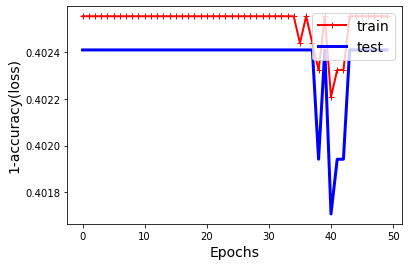

In [ ]:
import warnings
nEpochs = 50

nn_clf = MLPClassifier(max_iter=1,warm_start='true',solver='sgd')

train_errors, test_errors = [], []

for epoch in range(nEpochs): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        nn_clf.fit(X_train, y_train)
    print(f'Iteration {epoch}, loss = {nn_clf.loss_}')
    train_errors.append(1-accuracy_score(y_train, nn_clf.predict(X_train)))
    test_errors.append(1-accuracy_score(y_test, nn_clf.predict(X_test)))
    
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("1-accuracy(loss)", fontsize=14)  
    
    

# Now Will validate trough the Test Directory 

In [ ]:
dirs = list(os.walk('testing\\'))[1:]
data = np.zeros((1,32,32))
for i in dirs:
    for filename in i[2]:
        img = io.imread(os.path.join(i[0],filename))
        print(os.path.join(i[0],filename))
        img = rgb2gray(img)
        img = img.copy()
        img.resize((1,32,32))
        data = np.concatenate((data,img),axis=0)
        print(data.shape)



testing\canvas1\canvas1-a-p031.png
(2, 32, 32)
testing\canvas1\canvas1-a-p032.png
(3, 32, 32)
testing\canvas1\canvas1-a-p033.png
(4, 32, 32)
testing\canvas1\canvas1-a-p034.png
(5, 32, 32)
testing\canvas1\canvas1-a-p035.png
(6, 32, 32)
testing\canvas1\canvas1-a-p036.png
(7, 32, 32)
testing\canvas1\canvas1-a-p037.png
(8, 32, 32)
testing\canvas1\canvas1-a-p038.png
(9, 32, 32)
testing\canvas1\canvas1-a-p039.png
(10, 32, 32)
testing\canvas1\canvas1-a-p040.png
(11, 32, 32)
testing\cushion1\cushion1-a-p031.png
(12, 32, 32)
testing\cushion1\cushion1-a-p032.png
(13, 32, 32)
testing\cushion1\cushion1-a-p033.png
(14, 32, 32)
testing\cushion1\cushion1-a-p034.png
(15, 32, 32)
testing\cushion1\cushion1-a-p035.png
(16, 32, 32)
testing\cushion1\cushion1-a-p036.png
(17, 32, 32)
testing\cushion1\cushion1-a-p037.png
(18, 32, 32)
testing\cushion1\cushion1-a-p038.png
(19, 32, 32)
testing\cushion1\cushion1-a-p039.png
(20, 32, 32)
testing\cushion1\cushion1-a-p040.png
(21, 32, 32)
testing\linsseeds1\linseeds1

In [ ]:
data = data[1:]

In [ ]:
data.shape

(60, 32, 32)

# Preparing Dataset


In [ ]:
canvas = data[:10]
cushion = data[10:20]
linsseeds = data[20:30]
sand = data[30:40]
seat = data[40:50]
stone = data[50:]
stone.shape

(10, 32, 32)

In [ ]:
def make_combine(dataset):
    arr = np.zeros((1,2,32,32))
    for img1,img2 in combinations(dataset,2):
        temp = np.concatenate((img1,img2),axis=0)
        temp = temp.reshape((1,2,32,32))
        arr = np.concatenate((arr,temp))

    arr = arr[1:,:,:,:]
    return arr.copy()

stone_stone_x = make_combine(stone)
canvas_canvas_x = make_combine(canvas)
cushion_cushion_x = make_combine(cushion)
linsseeds_linsseeds_x = make_combine(linsseeds)
sand_sand_x = make_combine(sand)
seat_seat_x = make_combine(seat)
print(seat_seat_x.shape)


(45, 2, 32, 32)


In [ ]:
def make_product(dataset1,datset2):
    arr = np.zeros((1,2,32,32))
    for img1,img2 in product(dataset1,datset2):
        temp = np.concatenate((img1,img2),axis=0)
        temp = temp.reshape((1,2,32,32))
        arr = np.concatenate((arr,temp))

    arr = arr[1:,:,:,:]
    return arr.copy()
stone_canvas_x = make_product(stone,canvas)
stone_cushion_x = make_product(stone,cushion)
stone_linsseeds_x = make_product(stone,linsseeds)
stone_sand_x = make_product(stone,sand)
stone_seat_x = make_product(stone,seat)

canvas_sand_x = make_product(canvas,sand)
canvas_cushion_x = make_product(canvas,cushion)
canvas_linsseeds_x = make_product(canvas,linsseeds)
canvas_seat_x = make_product(canvas,seat)

cushion_linsseeds_x = make_product(cushion,linsseeds)
cushion_sand_x = make_product(cushion,sand)
cushion_seat_x = make_product(cushion,seat)

linsseeds_sand_x = make_product(linsseeds,sand)
linsseeds_seat_x = make_product(linsseeds,seat)

sand_seat_x = make_product(sand,seat)

print(stone_canvas_x.shape)

(100, 2, 32, 32)


Function by Aurelien Geron to plot sample images in a matrix.

In [ ]:
stone_canvas_y = np.zeros((stone_canvas_x.shape[0],))
stone_cushion_y = np.zeros((stone_cushion_x.shape[0],))
stone_linsseeds_y = np.zeros((stone_linsseeds_x.shape[0],))
stone_sand_y = np.zeros((stone_sand_x.shape[0],))
stone_seat_y = np.zeros((stone_seat_x.shape[0],))

canvas_sand_y = np.zeros((canvas_sand_x.shape[0],))
canvas_cushion_y = np.zeros((canvas_cushion_x.shape[0],))
canvas_linsseeds_y = np.zeros((canvas_linsseeds_x.shape[0],))
canvas_seat_y = np.zeros((canvas_seat_x.shape[0],))

cushion_linsseeds_y = np.zeros((cushion_linsseeds_x.shape[0],))
cushion_sand_y = np.zeros((cushion_sand_x.shape[0],))
cushion_seat_y = np.zeros((cushion_seat_x.shape[0],))

linsseeds_sand_y = np.zeros((linsseeds_sand_x.shape[0],))
linsseeds_seat_y = np.zeros((linsseeds_seat_x.shape[0],))

sand_seat_y = np.zeros((sand_seat_x.shape[0],))


In [ ]:
stone_stone_y = np.ones((stone_stone_x.shape[0],))
canvas_canvas_y = np.ones((canvas_canvas_x.shape[0],))
cushion_cushion_y = np.ones((cushion_cushion_x.shape[0],))
linsseeds_linsseeds_y = np.ones((linsseeds_linsseeds_x.shape[0],))
sand_sand_y = np.ones((sand_sand_x.shape[0],))
seat_seat_y = np.ones((seat_seat_x.shape[0],))

In [ ]:
full_data = np.concatenate([stone_canvas_x,stone_stone_x,stone_cushion_x,stone_linsseeds_x,stone_sand_x,stone_seat_x,canvas_canvas_x,canvas_cushion_x,canvas_linsseeds_x,canvas_sand_x,canvas_seat_x,linsseeds_linsseeds_x,linsseeds_sand_x,linsseeds_seat_x,cushion_linsseeds_x,cushion_cushion_x,cushion_sand_x,cushion_seat_x,sand_sand_x,sand_seat_x,seat_seat_x],axis=0)

In [ ]:
full_data.shape

(1770, 2, 32, 32)

In [ ]:
full_label = np.concatenate([stone_canvas_y,stone_stone_y,stone_cushion_y,stone_linsseeds_y,stone_sand_y,stone_seat_y,canvas_canvas_y,canvas_cushion_y,canvas_linsseeds_y,canvas_sand_y,canvas_seat_y,linsseeds_linsseeds_y,linsseeds_sand_y,linsseeds_seat_y,cushion_linsseeds_y,cushion_cushion_y,cushion_sand_y,cushion_seat_y,sand_sand_y,sand_seat_y,seat_seat_y],axis=0)

In [ ]:
full_label.shape

(1770,)

In [ ]:
threshcc = get_thresh_cc(full_data)
threshconv = get_thresh_conv(full_data)
threshssd = get_thresh_ssd(full_data)

In [ ]:
y_cc = []
y_ssd = []
y_conv = []

In [ ]:
start_time = time.time()
for i in range(full_data.shape[0]):

    y_ssd.append(matchingImages(full_data[i][0],full_data[i][1],threshssd,'ssd','n'))
    y_cc.append(matchingImages(full_data[i][0],full_data[i][1],threshcc,'cc','n'))
    y_conv.append(matchingImages(full_data[i][0],full_data[i][1],threshconv,'conv','n'))

exec_time_template_Non = time.time()-start_time

In [ ]:

print('Classifier accuracy on the training set using SSD {0} '.format(accuracy_score(y_ssd, full_label)))
print('Classifier accuracy on the training set using CC {0} '.format(accuracy_score(y_cc, full_label)))
print('Classifier accuracy on the training set using CONV {0} '.format(accuracy_score(y_conv, full_label)))

Classifier accuracy on the training set using SSD 0.7694915254237288 
Classifier accuracy on the training set using CC 0.6649717514124294 
Classifier accuracy on the training set using CONV 0.668361581920904 


In [ ]:
print(f'execution time {exec_time_template_Non}')

execution time 0.21593761444091797


In [ ]:
threshcc = get_thresh_cc(full_data,'y')
threshconv = get_thresh_conv(full_data,'y')
threshssd = get_thresh_ssd(full_data,'y')
y_cc = []
y_ssd = []
y_conv = []
start_time = time.time()
for i in range(full_data.shape[0]):

    y_ssd.append(matchingImages(full_data[i][0],full_data[i][1],threshssd,'ssd','y'))
    y_cc.append(matchingImages(full_data[i][0],full_data[i][1],threshcc,'cc','y'))
    y_conv.append(matchingImages(full_data[i][0],full_data[i][1],threshconv,'conv','y'))

exec_time_template_With = time.time()-start_time

In [ ]:
print('With Normalized Images:\n')
print('Classifier accuracy on the training set using SSD {0} '.format(accuracy_score(y_ssd, full_label)))
print('Classifier accuracy on the training set using CC {0} '.format(accuracy_score(y_cc, full_label)))
print('Classifier accuracy on the training set using CONV {0} '.format(accuracy_score(y_conv, full_label)))
print(f'execution time {exec_time_template_With}')

With Normalized Images:

Classifier accuracy on the training set using SSD 0.7672316384180791 
Classifier accuracy on the training set using CC 0.7022598870056497 
Classifier accuracy on the training set using CONV 0.6853107344632768 
execution time 0.7842957973480225


In [ ]:
full_data = full_data.reshape((full_data.shape[0],full_data.shape[1]*full_data.shape[2]*full_data.shape[3]))
full_data.shape

(1770, 2048)

In [ ]:
y_pred = nn_clf.predict(full_data)

print('Classifier accuracy is {0} '.format(accuracy_score(full_label, y_pred)))


Classifier accuracy is 0.847457627118644 


# Feature Engineering

In [ ]:
dirs = list(os.walk('training\\'))[1:]
data = np.zeros((1,32,32))
for i in dirs:
    for filename in i[2]:
        img = io.imread(os.path.join(i[0],filename))
        print(os.path.join(i[0],filename))
        img = rgb2gray(img)
        img = img.copy()
        img.resize((1,32,32))
        data = np.concatenate((data,img),axis=0)
        print(data.shape)



training\canvas1\canvas1-a-p001.png
(2, 32, 32)
training\canvas1\canvas1-a-p002.png
(3, 32, 32)
training\canvas1\canvas1-a-p003.png
(4, 32, 32)
training\canvas1\canvas1-a-p004.png
(5, 32, 32)
training\canvas1\canvas1-a-p005.png
(6, 32, 32)
training\canvas1\canvas1-a-p006.png
(7, 32, 32)
training\canvas1\canvas1-a-p007.png
(8, 32, 32)
training\canvas1\canvas1-a-p008.png
(9, 32, 32)
training\canvas1\canvas1-a-p009.png
(10, 32, 32)
training\canvas1\canvas1-a-p010.png
(11, 32, 32)
training\canvas1\canvas1-a-p011.png
(12, 32, 32)
training\canvas1\canvas1-a-p012.png
(13, 32, 32)
training\canvas1\canvas1-a-p013.png
(14, 32, 32)
training\canvas1\canvas1-a-p014.png
(15, 32, 32)
training\canvas1\canvas1-a-p015.png
(16, 32, 32)
training\canvas1\canvas1-a-p016.png
(17, 32, 32)
training\canvas1\canvas1-a-p017.png
(18, 32, 32)
training\canvas1\canvas1-a-p018.png
(19, 32, 32)
training\canvas1\canvas1-a-p019.png
(20, 32, 32)
training\canvas1\canvas1-a-p020.png
(21, 32, 32)
training\canvas1\canvas1-a-p

In [ ]:
data = data[1:]

In [ ]:
data.shape

(180, 32, 32)

##### Preparing Dataset


In [ ]:
canvas = data[:30]
cushion = data[30:60]
linsseeds = data[60:90]
sand = data[90:120]
seat = data[120:150]
stone = data[150:]
stone.shape

(30, 32, 32)

In [ ]:
def make_combine(dataset):
    arr = np.zeros((1,2,32,32))
    for img1,img2 in combinations(dataset,2):
        temp = np.concatenate((img1,img2),axis=0)
        temp = temp.reshape((1,2,32,32))
        arr = np.concatenate((arr,temp))

    arr = arr[1:,:,:,:]
    return arr.copy()

stone_stone_x = make_combine(stone)
canvas_canvas_x = make_combine(canvas)
cushion_cushion_x = make_combine(cushion)
linsseeds_linsseeds_x = make_combine(linsseeds)
sand_sand_x = make_combine(sand)
seat_seat_x = make_combine(seat)
print(seat_seat_x.shape)


(435, 2, 32, 32)


In [ ]:
def make_product(dataset1,datset2):
    arr = np.zeros((1,2,32,32))
    for img1,img2 in product(dataset1,datset2):
        temp = np.concatenate((img1,img2),axis=0)
        temp = temp.reshape((1,2,32,32))
        arr = np.concatenate((arr,temp))

    arr = arr[1:,:,:,:]
    return arr.copy()
stone_canvas_x = make_product(stone,canvas)
stone_cushion_x = make_product(stone,cushion)
stone_linsseeds_x = make_product(stone,linsseeds)
stone_sand_x = make_product(stone,sand)
stone_seat_x = make_product(stone,seat)

canvas_sand_x = make_product(canvas,sand)
canvas_cushion_x = make_product(canvas,cushion)
canvas_linsseeds_x = make_product(canvas,linsseeds)
canvas_seat_x = make_product(canvas,seat)

cushion_linsseeds_x = make_product(cushion,linsseeds)
cushion_sand_x = make_product(cushion,sand)
cushion_seat_x = make_product(cushion,seat)

linsseeds_sand_x = make_product(linsseeds,sand)
linsseeds_seat_x = make_product(linsseeds,seat)

sand_seat_x = make_product(sand,seat)

print(stone_canvas_x.shape)

(900, 2, 32, 32)


In [ ]:
stone_canvas_y = np.zeros((stone_canvas_x.shape[0],))
stone_cushion_y = np.zeros((stone_cushion_x.shape[0],))
stone_linsseeds_y = np.zeros((stone_linsseeds_x.shape[0],))
stone_sand_y = np.zeros((stone_sand_x.shape[0],))
stone_seat_y = np.zeros((stone_seat_x.shape[0],))

canvas_sand_y = np.zeros((canvas_sand_x.shape[0],))
canvas_cushion_y = np.zeros((canvas_cushion_x.shape[0],))
canvas_linsseeds_y = np.zeros((canvas_linsseeds_x.shape[0],))
canvas_seat_y = np.zeros((canvas_seat_x.shape[0],))

cushion_linsseeds_y = np.zeros((cushion_linsseeds_x.shape[0],))
cushion_sand_y = np.zeros((cushion_sand_x.shape[0],))
cushion_seat_y = np.zeros((cushion_seat_x.shape[0],))

linsseeds_sand_y = np.zeros((linsseeds_sand_x.shape[0],))
linsseeds_seat_y = np.zeros((linsseeds_seat_x.shape[0],))

sand_seat_y = np.zeros((sand_seat_x.shape[0],))


In [ ]:
stone_stone_y = np.ones((stone_stone_x.shape[0],))
canvas_canvas_y = np.ones((canvas_canvas_x.shape[0],))
cushion_cushion_y = np.ones((cushion_cushion_x.shape[0],))
linsseeds_linsseeds_y = np.ones((linsseeds_linsseeds_x.shape[0],))
sand_sand_y = np.ones((sand_sand_x.shape[0],))
seat_seat_y = np.ones((seat_seat_x.shape[0],))

In [ ]:
full_data = np.concatenate([stone_canvas_x,stone_stone_x,stone_cushion_x,stone_linsseeds_x,stone_sand_x,stone_seat_x,canvas_canvas_x,canvas_cushion_x,canvas_linsseeds_x,canvas_sand_x,canvas_seat_x,linsseeds_linsseeds_x,linsseeds_sand_x,linsseeds_seat_x,cushion_linsseeds_x,cushion_cushion_x,cushion_sand_x,cushion_seat_x,sand_sand_x,sand_seat_x,seat_seat_x],axis=0)

In [ ]:
full_data.shape

(16110, 2, 32, 32)

In [ ]:
full_label = np.concatenate([stone_canvas_y,stone_stone_y,stone_cushion_y,stone_linsseeds_y,stone_sand_y,stone_seat_y,canvas_canvas_y,canvas_cushion_y,canvas_linsseeds_y,canvas_sand_y,canvas_seat_y,linsseeds_linsseeds_y,linsseeds_sand_y,linsseeds_seat_y,cushion_linsseeds_y,cushion_cushion_y,cushion_sand_y,cushion_seat_y,sand_sand_y,sand_seat_y,seat_seat_y],axis=0)

In [ ]:
full_label.shape

(16110,)

**Reshaping Data**

In [ ]:
full_data = full_data.reshape((full_data.shape[0],full_data.shape[1]*full_data.shape[2]*full_data.shape[3]))

In [ ]:
full_data.shape

(16110, 2048)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=32)

In [ ]:
pca.fit(full_data)

PCA(n_components=32)

In [ ]:
full_data = pca.transform(full_data)

In [ ]:
full_data.shape

(16110, 32)

# Test and Training Data

Split data into test and training data after re-shuffling the datatest.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(full_data, full_label, test_size=0.33, stratify=full_label, random_state=42)

print('Matrix shape X: ', X_train.shape)
print('{0} samples for training'.format(X_train.shape[0]))
print('{0} samples for testing'.format(X_test.shape[0]))

Matrix shape X:  (10793, 32)
10793 samples for training
5317 samples for testing


Could compare with logistic regression

In [ ]:
start_time = time.time()

nn_clf = MLPClassifier(max_iter=1000,solver='sgd',verbose='true',early_stopping=True,validation_fraction=0.3,learning_rate='adaptive')
nn_clf.fit(X_train, y_train)
exec_time_MLP = time.time()-start_time

Iteration 1, loss = 7.28176212
Validation score: 0.837863
Iteration 2, loss = 6.03302829
Validation score: 0.757566
Iteration 3, loss = 5.12038373
Validation score: 0.800185
Iteration 4, loss = 3.93814389
Validation score: 0.831377
Iteration 5, loss = 2.84640757
Validation score: 0.757258
Iteration 6, loss = 2.82421292
Validation score: 0.840334
Iteration 7, loss = 3.18526496
Validation score: 0.820259
Iteration 8, loss = 1.80984404
Validation score: 0.785361
Iteration 9, loss = 1.73418564
Validation score: 0.842804
Iteration 10, loss = 1.12052372
Validation score: 0.846201
Iteration 11, loss = 1.09589279
Validation score: 0.856393
Iteration 12, loss = 1.35147989
Validation score: 0.844040
Iteration 13, loss = 0.89849253
Validation score: 0.861025
Iteration 14, loss = 0.68260708
Validation score: 0.792773
Iteration 15, loss = 0.47687694
Validation score: 0.702903
Iteration 16, loss = 0.59911379
Validation score: 0.831995
Iteration 17, loss = 0.40304285
Validation score: 0.859790
Iterat

Let's see what the network looks like

In [ ]:
print(f'Number of layers {nn_clf.n_layers_}')
for lyr in range(nn_clf.n_layers_-1):
    print('Layer {0}: Weights {1} Bias {2}'.format(lyr,nn_clf.coefs_[lyr].shape, nn_clf.intercepts_[lyr].shape))


Number of layers 3
Layer 0: Weights (32, 100) Bias (100,)
Layer 1: Weights (100, 1) Bias (1,)


In [ ]:
print(f'execution time is {exec_time_MLP}')

execution time is 14.712539672851562


Let's calculate accuracy

In [ ]:
y_pred = nn_clf.predict(X_train)
y_pred_test = nn_clf.predict(X_test)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train, y_pred)))
print('Classifier accuracy on the test set is {0} '.format(accuracy_score(y_test, y_pred_test)))

Classifier accuracy on the training set is 0.9693319744278699 
Classifier accuracy on the test set is 0.8969343614820388 


# Accuracy and Loss Visualization For MLP

Iteration 0, loss = 7.3889172520102555
Iteration 1, loss = 5.202319781950705
Iteration 2, loss = 3.8317841839590865
Iteration 3, loss = 3.1976753414898424
Iteration 4, loss = 2.055342776189652
Iteration 5, loss = 2.0439292272509286
Iteration 6, loss = 0.8438701836080603
Iteration 7, loss = 1.2359946751674002
Iteration 8, loss = 0.653792842097092
Iteration 9, loss = 0.5673472939255072
Iteration 10, loss = 0.6130096066574876
Iteration 11, loss = 0.4544914190517544
Iteration 12, loss = 0.32259393327691166
Iteration 13, loss = 0.3217827967073019
Iteration 14, loss = 0.2687789258716237
Iteration 15, loss = 0.2611765874714266
Iteration 16, loss = 0.34266378183598906
Iteration 17, loss = 0.3110660345866595
Iteration 18, loss = 0.2724024419206615
Iteration 19, loss = 0.2635137335408739
Iteration 20, loss = 0.23689624149009086
Iteration 21, loss = 0.2227467945689466
Iteration 22, loss = 0.21126766240166053
Iteration 23, loss = 0.20360805893706452
Iteration 24, loss = 0.1839379003941378
Iteratio

Text(0, 0.5, '1-accuracy(loss)')

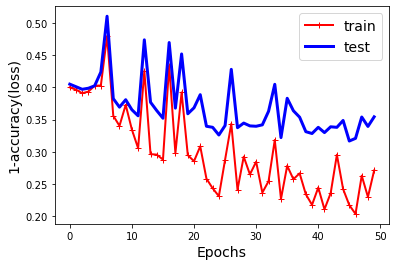

In [ ]:
import warnings
nEpochs = 50

nn_clf = MLPClassifier(max_iter=1,warm_start='true',solver='sgd')

train_errors, test_errors = [], []

for epoch in range(nEpochs): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        nn_clf.fit(X_train, y_train)
    print(f'Iteration {epoch}, loss = {nn_clf.loss_}')
    train_errors.append(1-accuracy_score(y_train, nn_clf.predict(X_train)))
    test_errors.append(1-accuracy_score(y_test, nn_clf.predict(X_test)))
    
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("1-accuracy(loss)", fontsize=14)  
    
    

# Now Will validate trough the Test Directory 

In [ ]:
dirs = list(os.walk('testing\\'))[1:]
data = np.zeros((1,32,32))
for i in dirs:
    for filename in i[2]:
        img = io.imread(os.path.join(i[0],filename))
        print(os.path.join(i[0],filename))
        img = rgb2gray(img)
        img = img.copy()
        img.resize((1,32,32))
        data = np.concatenate((data,img),axis=0)
        print(data.shape)



testing\canvas1\canvas1-a-p031.png
(2, 32, 32)
testing\canvas1\canvas1-a-p032.png
(3, 32, 32)
testing\canvas1\canvas1-a-p033.png
(4, 32, 32)
testing\canvas1\canvas1-a-p034.png
(5, 32, 32)
testing\canvas1\canvas1-a-p035.png
(6, 32, 32)
testing\canvas1\canvas1-a-p036.png
(7, 32, 32)
testing\canvas1\canvas1-a-p037.png
(8, 32, 32)
testing\canvas1\canvas1-a-p038.png
(9, 32, 32)
testing\canvas1\canvas1-a-p039.png
(10, 32, 32)
testing\canvas1\canvas1-a-p040.png
(11, 32, 32)
testing\cushion1\cushion1-a-p031.png
(12, 32, 32)
testing\cushion1\cushion1-a-p032.png
(13, 32, 32)
testing\cushion1\cushion1-a-p033.png
(14, 32, 32)
testing\cushion1\cushion1-a-p034.png
(15, 32, 32)
testing\cushion1\cushion1-a-p035.png
(16, 32, 32)
testing\cushion1\cushion1-a-p036.png
(17, 32, 32)
testing\cushion1\cushion1-a-p037.png
(18, 32, 32)
testing\cushion1\cushion1-a-p038.png
(19, 32, 32)
testing\cushion1\cushion1-a-p039.png
(20, 32, 32)
testing\cushion1\cushion1-a-p040.png
(21, 32, 32)
testing\linsseeds1\linseeds1

In [ ]:
data = data[1:]

In [ ]:
data.shape

(60, 32, 32)

#### Preparing Dataset


In [ ]:
canvas = data[:10]
cushion = data[10:20]
linsseeds = data[20:30]
sand = data[30:40]
seat = data[40:50]
stone = data[50:]
stone.shape

(10, 32, 32)

In [ ]:
def make_combine(dataset):
    arr = np.zeros((1,2,32,32))
    for img1,img2 in combinations(dataset,2):
        temp = np.concatenate((img1,img2),axis=0)
        temp = temp.reshape((1,2,32,32))
        arr = np.concatenate((arr,temp))

    arr = arr[1:,:,:,:]
    return arr.copy()

stone_stone_x = make_combine(stone)
canvas_canvas_x = make_combine(canvas)
cushion_cushion_x = make_combine(cushion)
linsseeds_linsseeds_x = make_combine(linsseeds)
sand_sand_x = make_combine(sand)
seat_seat_x = make_combine(seat)
print(seat_seat_x.shape)


(45, 2, 32, 32)


In [ ]:
def make_product(dataset1,datset2):
    arr = np.zeros((1,2,32,32))
    for img1,img2 in product(dataset1,datset2):
        temp = np.concatenate((img1,img2),axis=0)
        temp = temp.reshape((1,2,32,32))
        arr = np.concatenate((arr,temp))

    arr = arr[1:,:,:,:]
    return arr.copy()
stone_canvas_x = make_product(stone,canvas)
stone_cushion_x = make_product(stone,cushion)
stone_linsseeds_x = make_product(stone,linsseeds)
stone_sand_x = make_product(stone,sand)
stone_seat_x = make_product(stone,seat)

canvas_sand_x = make_product(canvas,sand)
canvas_cushion_x = make_product(canvas,cushion)
canvas_linsseeds_x = make_product(canvas,linsseeds)
canvas_seat_x = make_product(canvas,seat)

cushion_linsseeds_x = make_product(cushion,linsseeds)
cushion_sand_x = make_product(cushion,sand)
cushion_seat_x = make_product(cushion,seat)

linsseeds_sand_x = make_product(linsseeds,sand)
linsseeds_seat_x = make_product(linsseeds,seat)

sand_seat_x = make_product(sand,seat)

print(stone_canvas_x.shape)

(100, 2, 32, 32)


Function by Aurelien Geron to plot sample images in a matrix.

In [ ]:
stone_canvas_y = np.zeros((stone_canvas_x.shape[0],))
stone_cushion_y = np.zeros((stone_cushion_x.shape[0],))
stone_linsseeds_y = np.zeros((stone_linsseeds_x.shape[0],))
stone_sand_y = np.zeros((stone_sand_x.shape[0],))
stone_seat_y = np.zeros((stone_seat_x.shape[0],))

canvas_sand_y = np.zeros((canvas_sand_x.shape[0],))
canvas_cushion_y = np.zeros((canvas_cushion_x.shape[0],))
canvas_linsseeds_y = np.zeros((canvas_linsseeds_x.shape[0],))
canvas_seat_y = np.zeros((canvas_seat_x.shape[0],))

cushion_linsseeds_y = np.zeros((cushion_linsseeds_x.shape[0],))
cushion_sand_y = np.zeros((cushion_sand_x.shape[0],))
cushion_seat_y = np.zeros((cushion_seat_x.shape[0],))

linsseeds_sand_y = np.zeros((linsseeds_sand_x.shape[0],))
linsseeds_seat_y = np.zeros((linsseeds_seat_x.shape[0],))

sand_seat_y = np.zeros((sand_seat_x.shape[0],))


In [ ]:
stone_stone_y = np.ones((stone_stone_x.shape[0],))
canvas_canvas_y = np.ones((canvas_canvas_x.shape[0],))
cushion_cushion_y = np.ones((cushion_cushion_x.shape[0],))
linsseeds_linsseeds_y = np.ones((linsseeds_linsseeds_x.shape[0],))
sand_sand_y = np.ones((sand_sand_x.shape[0],))
seat_seat_y = np.ones((seat_seat_x.shape[0],))

In [ ]:
full_data = np.concatenate([stone_canvas_x,stone_stone_x,stone_cushion_x,stone_linsseeds_x,stone_sand_x,stone_seat_x,canvas_canvas_x,canvas_cushion_x,canvas_linsseeds_x,canvas_sand_x,canvas_seat_x,linsseeds_linsseeds_x,linsseeds_sand_x,linsseeds_seat_x,cushion_linsseeds_x,cushion_cushion_x,cushion_sand_x,cushion_seat_x,sand_sand_x,sand_seat_x,seat_seat_x],axis=0)

In [ ]:
full_data.shape

(1770, 2, 32, 32)

In [ ]:
full_label = np.concatenate([stone_canvas_y,stone_stone_y,stone_cushion_y,stone_linsseeds_y,stone_sand_y,stone_seat_y,canvas_canvas_y,canvas_cushion_y,canvas_linsseeds_y,canvas_sand_y,canvas_seat_y,linsseeds_linsseeds_y,linsseeds_sand_y,linsseeds_seat_y,cushion_linsseeds_y,cushion_cushion_y,cushion_sand_y,cushion_seat_y,sand_sand_y,sand_seat_y,seat_seat_y],axis=0)

In [ ]:
full_label.shape

(1770,)

In [ ]:
full_data = full_data.reshape((full_data.shape[0],full_data.shape[1]*full_data.shape[2]*full_data.shape[3]))
full_data.shape

(1770, 2048)

In [ ]:
pca = PCA(n_components=32)
pca.fit(full_data)
full_data = pca.transform(full_data)
full_data.shape

(1770, 32)

In [ ]:
y_pred = nn_clf.predict(full_data)

print('Classifier accuracy is {0} '.format(accuracy_score(full_label, y_pred)))


Classifier accuracy is 0.6474576271186441 


In [ ]:
32*32

1024

# Feature Engineering Part 2

In [ ]:

%cp -r /content/drive/MyDrive/DLAssign2/Assignment_2/* ./

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import os
import numpy as np
from skimage.color import rgb2gray
from skimage import io
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
import pandas as pd
from itertools import product, combinations
import sys
import time
from sklearn.decomposition import PCA
pca = PCA(n_components=1024)

In [126]:
import math

In [127]:
LoA=[]

In [128]:
dirs = list(os.walk('training/'))[1:]
#data = np.zeros((1,32,32))
for i in dirs:
    for filename in i[2]:
        img = io.imread(os.path.join(i[0],filename))
        #print(os.path.join(i[0],filename))
        img = rgb2gray(img)
        LoA.append(img.shape)
        #img = img.copy()
        #img = img.flatten()
        #img = img.reshape(1,-1)
        #print(img.shape)
        #pca.fit(img)
        #img = pca.fit_transform(img)
        #img.resize((1,32,32))
        #data = np.concatenate((data,img),axis=0)
        #print(data.shape)

maxcountX = pd.DataFrame(data=LoA,columns=['X','Y']).X.max()
maxcountY = pd.DataFrame(data=LoA,columns=['X','Y']).Y.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  import sys


In [129]:
32/576

0.05555555555555555

In [130]:
pd.DataFrame(data=LoA,columns=['X','Y']).X.unique()

array([576])

In [131]:
dirs = list(os.walk('training/'))[1:]
data = np.zeros((1,288,288))
for i in dirs:
    for filename in i[2]:
        img = io.imread(os.path.join(i[0],filename))
        print(os.path.join(i[0],filename))
        img = rgb2gray(img)
        img = img.copy()
        img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
        img = img.reshape((1,img.shape[0],img.shape[1]))
        data = np.concatenate((data,img),axis=0)
        print(data.shape)



training/seat2/seat2-a-p014.png
(2, 288, 288)
training/seat2/seat2-a-p002.png
(3, 288, 288)
training/seat2/seat2-a-p019.png
(4, 288, 288)
training/seat2/seat2-a-p024.png
(5, 288, 288)
training/seat2/seat2-a-p028.png
(6, 288, 288)
training/seat2/seat2-a-p015.png
(7, 288, 288)
training/seat2/seat2-a-p001.png
(8, 288, 288)
training/seat2/seat2-a-p026.png
(9, 288, 288)
training/seat2/seat2-a-p030.png
(10, 288, 288)
training/seat2/seat2-a-p007.png
(11, 288, 288)
training/seat2/seat2-a-p004.png
(12, 288, 288)
training/seat2/seat2-a-p021.png
(13, 288, 288)
training/seat2/seat2-a-p008.png
(14, 288, 288)
training/seat2/seat2-a-p006.png
(15, 288, 288)
training/seat2/seat2-a-p005.png
(16, 288, 288)
training/seat2/seat2-a-p010.png
(17, 288, 288)
training/seat2/seat2-a-p027.png
(18, 288, 288)
training/seat2/seat2-a-p017.png
(19, 288, 288)
training/seat2/seat2-a-p023.png
(20, 288, 288)
training/seat2/seat2-a-p020.png
(21, 288, 288)
training/seat2/seat2-a-p025.png
(22, 288, 288)
training/seat2/seat2-

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  import sys


(26, 288, 288)
training/seat2/seat2-a-p029.png
(27, 288, 288)
training/seat2/seat2-a-p009.png
(28, 288, 288)
training/seat2/seat2-a-p013.png
(29, 288, 288)
training/seat2/seat2-a-p003.png
(30, 288, 288)
training/seat2/seat2-a-p022.png
(31, 288, 288)
training/sand1/sand1-a-p022.png
(32, 288, 288)
training/sand1/sand1-a-p010.png
(33, 288, 288)
training/sand1/sand1-a-p024.png
(34, 288, 288)
training/sand1/sand1-a-p028.png
(35, 288, 288)
training/sand1/sand1-a-p019.png
(36, 288, 288)
training/sand1/sand1-a-p014.png
(37, 288, 288)
training/sand1/sand1-a-p005.png
(38, 288, 288)
training/sand1/sand1-a-p004.png
(39, 288, 288)
training/sand1/sand1-a-p027.png
(40, 288, 288)
training/sand1/sand1-a-p011.png
(41, 288, 288)
training/sand1/sand1-a-p002.png
(42, 288, 288)
training/sand1/sand1-a-p029.png
(43, 288, 288)
training/sand1/sand1-a-p025.png
(44, 288, 288)
training/sand1/sand1-a-p003.png
(45, 288, 288)
training/sand1/sand1-a-p008.png
(46, 288, 288)
training/sand1/sand1-a-p001.png
(47, 288, 288

In [132]:
data = data[1:]

In [133]:
data.shape

(180, 288, 288)

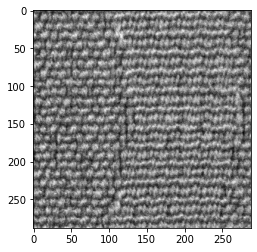

In [134]:
plt.imshow(data[0,:,:],'gray')

In [135]:
data = data.reshape((data.shape[0],data.shape[1]*data.shape[2]))

In [136]:
data.shape

(180, 82944)

In [137]:
temp = data.copy()
while(data.shape[0]<1080):
    
    data = np.concatenate((data,temp),axis=0)
    print(data.shape[0])

360
540
720
900
1080


In [138]:
data.shape

(1080, 82944)

In [139]:
pca.fit(data)

PCA(n_components=1024)

In [140]:
data = pca.transform(data)

In [141]:
data[:180].shape

(180, 1024)

In [142]:
tempTrain = data.copy()

In [143]:
data = data[:180].reshape(data[:180].shape[0],int(math.sqrt(data.shape[1])),int(math.sqrt(data.shape[1])))

In [144]:
data.shape

(180, 32, 32)

##### Preparing Dataset


In [146]:
seat = data[:30]
sand = data[30:60]
stone = data[60:90]
canvas = data[90:120]
cushion = data[120:150]
linsseeds = data[150:]
stone.shape

(30, 32, 32)

In [147]:
def make_combine(dataset):
    arr = np.zeros((1,2,32,32))
    for img1,img2 in combinations(dataset,2):
        temp = np.concatenate((img1,img2),axis=0)
        temp = temp.reshape((1,2,32,32))
        arr = np.concatenate((arr,temp))

    arr = arr[1:,:,:,:]
    return arr.copy()

stone_stone_x = make_combine(stone)
canvas_canvas_x = make_combine(canvas)
cushion_cushion_x = make_combine(cushion)
linsseeds_linsseeds_x = make_combine(linsseeds)
sand_sand_x = make_combine(sand)
seat_seat_x = make_combine(seat)
print(seat_seat_x.shape)


(435, 2, 32, 32)


In [148]:
def make_product(dataset1,datset2):
    arr = np.zeros((1,2,32,32))
    for img1,img2 in product(dataset1,datset2):
        temp = np.concatenate((img1,img2),axis=0)
        temp = temp.reshape((1,2,32,32))
        arr = np.concatenate((arr,temp))

    arr = arr[1:,:,:,:]
    return arr.copy()
stone_canvas_x = make_product(stone,canvas)
stone_cushion_x = make_product(stone,cushion)
stone_linsseeds_x = make_product(stone,linsseeds)
stone_sand_x = make_product(stone,sand)
stone_seat_x = make_product(stone,seat)

canvas_sand_x = make_product(canvas,sand)
canvas_cushion_x = make_product(canvas,cushion)
canvas_linsseeds_x = make_product(canvas,linsseeds)
canvas_seat_x = make_product(canvas,seat)

cushion_linsseeds_x = make_product(cushion,linsseeds)
cushion_sand_x = make_product(cushion,sand)
cushion_seat_x = make_product(cushion,seat)

linsseeds_sand_x = make_product(linsseeds,sand)
linsseeds_seat_x = make_product(linsseeds,seat)

sand_seat_x = make_product(sand,seat)

print(stone_canvas_x.shape)

(900, 2, 32, 32)


In [149]:
stone_canvas_y = np.zeros((stone_canvas_x.shape[0],))
stone_cushion_y = np.zeros((stone_cushion_x.shape[0],))
stone_linsseeds_y = np.zeros((stone_linsseeds_x.shape[0],))
stone_sand_y = np.zeros((stone_sand_x.shape[0],))
stone_seat_y = np.zeros((stone_seat_x.shape[0],))

canvas_sand_y = np.zeros((canvas_sand_x.shape[0],))
canvas_cushion_y = np.zeros((canvas_cushion_x.shape[0],))
canvas_linsseeds_y = np.zeros((canvas_linsseeds_x.shape[0],))
canvas_seat_y = np.zeros((canvas_seat_x.shape[0],))

cushion_linsseeds_y = np.zeros((cushion_linsseeds_x.shape[0],))
cushion_sand_y = np.zeros((cushion_sand_x.shape[0],))
cushion_seat_y = np.zeros((cushion_seat_x.shape[0],))

linsseeds_sand_y = np.zeros((linsseeds_sand_x.shape[0],))
linsseeds_seat_y = np.zeros((linsseeds_seat_x.shape[0],))

sand_seat_y = np.zeros((sand_seat_x.shape[0],))


In [150]:
stone_stone_y = np.ones((stone_stone_x.shape[0],))
canvas_canvas_y = np.ones((canvas_canvas_x.shape[0],))
cushion_cushion_y = np.ones((cushion_cushion_x.shape[0],))
linsseeds_linsseeds_y = np.ones((linsseeds_linsseeds_x.shape[0],))
sand_sand_y = np.ones((sand_sand_x.shape[0],))
seat_seat_y = np.ones((seat_seat_x.shape[0],))

In [151]:
full_data = np.concatenate([stone_canvas_x,stone_stone_x,stone_cushion_x,stone_linsseeds_x,stone_sand_x,stone_seat_x,canvas_canvas_x,canvas_cushion_x,canvas_linsseeds_x,canvas_sand_x,canvas_seat_x,linsseeds_linsseeds_x,linsseeds_sand_x,linsseeds_seat_x,cushion_linsseeds_x,cushion_cushion_x,cushion_sand_x,cushion_seat_x,sand_sand_x,sand_seat_x,seat_seat_x],axis=0)

In [152]:
full_data.shape

(16110, 2, 32, 32)

In [153]:
full_label = np.concatenate([stone_canvas_y,stone_stone_y,stone_cushion_y,stone_linsseeds_y,stone_sand_y,stone_seat_y,canvas_canvas_y,canvas_cushion_y,canvas_linsseeds_y,canvas_sand_y,canvas_seat_y,linsseeds_linsseeds_y,linsseeds_sand_y,linsseeds_seat_y,cushion_linsseeds_y,cushion_cushion_y,cushion_sand_y,cushion_seat_y,sand_sand_y,sand_seat_y,seat_seat_y],axis=0)

In [154]:
full_label.shape

(16110,)

**Reshaping Data**

In [155]:
full_data = full_data.reshape((full_data.shape[0],full_data.shape[1]*full_data.shape[2]*full_data.shape[3]))

In [156]:
full_data.shape

(16110, 2048)

## Test and Training Data

Split data into test and training data after re-shuffling the datatest.

In [157]:

X_train, X_test, y_train, y_test = train_test_split(full_data, full_label, test_size=0.33, stratify=full_label, random_state=42)

print('Matrix shape X: ', X_train.shape)
print('{0} samples for training'.format(X_train.shape[0]))
print('{0} samples for testing'.format(X_test.shape[0]))

Matrix shape X:  (10793, 2048)
10793 samples for training
5317 samples for testing


Could compare with logistic regression

In [158]:
start_time = time.time()

nn_clf = MLPClassifier(max_iter=1000,solver='sgd',verbose='true',early_stopping=True,validation_fraction=0.3,learning_rate='adaptive')
nn_clf.fit(X_train, y_train)
exec_time_MLP = time.time()-start_time

Iteration 1, loss = 8.26668377
Validation score: 0.723595
Iteration 2, loss = 6.93722330
Validation score: 0.804509
Iteration 3, loss = 8.43142433
Validation score: 0.849290
Iteration 4, loss = 18.08190746
Validation score: 0.796479
Iteration 5, loss = 2928.22348095
Validation score: 0.836319
Iteration 6, loss = 602658.11936305
Validation score: 0.779185
Iteration 7, loss = 66073099.71064653
Validation score: 0.786288
Iteration 8, loss = 20910472033.69090652
Validation score: 0.837863
Iteration 9, loss = 3373377247654.48876953
Validation score: 0.799568
Iteration 10, loss = 232373476636991.81250000
Validation score: 0.829216
Iteration 11, loss = 39024537651662416.00000000
Validation score: 0.772390
Iteration 12, loss = 3208348482213725696.00000000
Validation score: 0.842804
Iteration 13, loss = 952952756146191466496.00000000
Validation score: 0.789994
Iteration 14, loss = 63105453947477978775552.00000000
Validation score: 0.776714
Validation score did not improve more than tol=0.000100

Let's see what the network looks like

In [159]:
print(f'Number of layers {nn_clf.n_layers_}')
for lyr in range(nn_clf.n_layers_-1):
    print('Layer {0}: Weights {1} Bias {2}'.format(lyr,nn_clf.coefs_[lyr].shape, nn_clf.intercepts_[lyr].shape))


Number of layers 3
Layer 0: Weights (2048, 100) Bias (100,)
Layer 1: Weights (100, 1) Bias (1,)


In [160]:
print(f'execution time is {exec_time_MLP}')

execution time is 69.18229722976685


Let's calculate accuracy

In [161]:
y_pred = nn_clf.predict(X_train)
y_pred_test = nn_clf.predict(X_test)
print('Classifier accuracy on the training set is {0} '.format(accuracy_score(y_train, y_pred)))
print('Classifier accuracy on the test set is {0} '.format(accuracy_score(y_test, y_pred_test)))

Classifier accuracy on the training set is 0.9931437042527564 
Classifier accuracy on the test set is 0.9749858943012977 


## Accuracy and Loss Visualization For MLP

Iteration 0, loss = 7.979670261597004
Iteration 1, loss = 6.445501945501062
Iteration 2, loss = 4.804461579722504
Iteration 3, loss = 4.345696889418427
Iteration 4, loss = 5.000679524809327
Iteration 5, loss = 16.997091446911742
Iteration 6, loss = 63.82197223028936
Iteration 7, loss = 174.1648936908402
Iteration 8, loss = 489.7711705291873
Iteration 9, loss = 1458.9946633641573
Iteration 10, loss = 4638.0764136385105
Iteration 11, loss = 15145.66463401726
Iteration 12, loss = 55633.90333512804
Iteration 13, loss = 141832.44290436595
Iteration 14, loss = 295307.90210769087
Iteration 15, loss = 661577.87685984
Iteration 16, loss = 1426312.53138753
Iteration 17, loss = 2888465.1582875457
Iteration 18, loss = 5476950.031421896
Iteration 19, loss = 10607571.91194782
Iteration 20, loss = 23129402.963168852
Iteration 21, loss = 43648980.56335164
Iteration 22, loss = 100559768.05390659
Iteration 23, loss = 211309624.46852234
Iteration 24, loss = 397365457.6341517
Iteration 25, loss = 76122056

Text(0, 0.5, '1-accuracy(loss)')

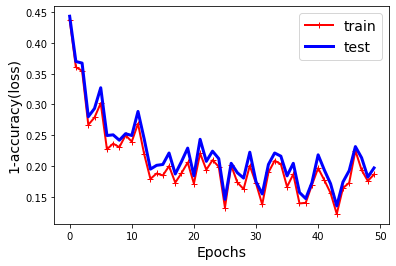

In [162]:
import warnings
nEpochs = 50

nn_clf = MLPClassifier(max_iter=1,warm_start='true',solver='sgd')

train_errors, test_errors = [], []

for epoch in range(nEpochs): 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        nn_clf.fit(X_train, y_train)
    print(f'Iteration {epoch}, loss = {nn_clf.loss_}')
    train_errors.append(1-accuracy_score(y_train, nn_clf.predict(X_train)))
    test_errors.append(1-accuracy_score(y_test, nn_clf.predict(X_test)))
    
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("1-accuracy(loss)", fontsize=14)  
    
    

## Now Will validate trough the Test Directory 

In [163]:
dirs = list(os.walk('testing/'))[1:]
data = np.zeros((1,288,288))
for i in dirs:
    for filename in i[2]:
        img = io.imread(os.path.join(i[0],filename))
        print(os.path.join(i[0],filename))
        img = rgb2gray(img)
        img = img.copy()
        img = cv2.resize(img, (0, 0), fx=0.5, fy=0.5)
        img = img.reshape((1,img.shape[0],img.shape[1]))
        data = np.concatenate((data,img),axis=0)
        print(data.shape)



testing/seat2/seat2-a-p034.png
(2, 288, 288)
testing/seat2/seat2-a-p039.png
(3, 288, 288)
testing/seat2/seat2-a-p040.png
(4, 288, 288)
testing/seat2/seat2-a-p038.png
(5, 288, 288)
testing/seat2/seat2-a-p035.png
(6, 288, 288)
testing/seat2/seat2-a-p037.png
(7, 288, 288)
testing/seat2/seat2-a-p033.png
(8, 288, 288)
testing/seat2/seat2-a-p031.png
(9, 288, 288)
testing/seat2/seat2-a-p032.png
(10, 288, 288)
testing/seat2/seat2-a-p036.png
(11, 288, 288)
testing/sand1/sand1-a-p035.png
(12, 288, 288)
testing/sand1/sand1-a-p040.png
(13, 288, 288)
testing/sand1/sand1-a-p034.png
(14, 288, 288)
testing/sand1/sand1-a-p032.png
(15, 288, 288)
testing/sand1/sand1-a-p037.png
(16, 288, 288)
testing/sand1/sand1-a-p033.png
(17, 288, 288)
testing/sand1/sand1-a-p036.png
(18, 288, 288)
testing/sand1/sand1-a-p039.png
(19, 288, 288)
testing/sand1/sand1-a-p031.png
(20, 288, 288)
testing/sand1/sand1-a-p038.png
(21, 288, 288)
testing/stone1/stone1-a-p037.png
(22, 288, 288)
testing/stone1/stone1-a-p033.png
(23, 28

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  import sys


testing/stone1/stone1-a-p040.png
(24, 288, 288)
testing/stone1/stone1-a-p031.png
(25, 288, 288)
testing/stone1/stone1-a-p034.png
(26, 288, 288)
testing/stone1/stone1-a-p032.png
(27, 288, 288)
testing/stone1/stone1-a-p035.png
(28, 288, 288)
testing/stone1/stone1-a-p036.png
(29, 288, 288)
testing/stone1/stone1-a-p039.png
(30, 288, 288)
testing/stone1/stone1-a-p038.png
(31, 288, 288)
testing/canvas1/canvas1-a-p032.png
(32, 288, 288)
testing/canvas1/canvas1-a-p036.png
(33, 288, 288)
testing/canvas1/canvas1-a-p037.png
(34, 288, 288)
testing/canvas1/canvas1-a-p039.png
(35, 288, 288)
testing/canvas1/canvas1-a-p034.png
(36, 288, 288)
testing/canvas1/canvas1-a-p038.png
(37, 288, 288)
testing/canvas1/canvas1-a-p033.png
(38, 288, 288)
testing/canvas1/canvas1-a-p035.png
(39, 288, 288)
testing/canvas1/canvas1-a-p040.png
(40, 288, 288)
testing/canvas1/canvas1-a-p031.png
(41, 288, 288)
testing/cushion1/cushion1-a-p034.png
(42, 288, 288)
testing/cushion1/cushion1-a-p039.png
(43, 288, 288)
testing/cush

In [164]:
data = data[1:]

In [165]:
data.shape

(60, 288, 288)

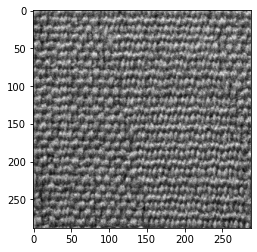

In [166]:
plt.imshow(data[0,:,:],'gray')

In [167]:
data = data.reshape((data.shape[0],data.shape[1]*data.shape[2]))

In [168]:
data.shape

(60, 82944)

In [169]:
60*(1024//60)

1020

In [170]:
temp = data.copy()
while(data.shape[0]<1080):
    
    data = np.concatenate((data,temp),axis=0)
    print(data.shape[0])

120
180
240
300
360
420
480
540
600
660
720
780
840
900
960
1020
1080


In [171]:
data.shape

(1080, 82944)

In [172]:
data = pca.transform(data)

In [173]:
data[:60].shape

(60, 1024)

In [174]:
tempTest = data.copy()

In [ ]:
data = temp.copy()

In [175]:
data = data[:60].reshape(data[:60].shape[0],int(math.sqrt(data.shape[1])),int(math.sqrt(data.shape[1])))

In [176]:
data.shape

(60, 32, 32)

##### Preparing Dataset


#### Preparing Dataset


In [177]:
seat = data[:10]
sand = data[10:20]
stone = data[20:30]
canvas = data[30:40]
cushion = data[40:50]
linsseeds = data[50:]
stone.shape

(10, 32, 32)

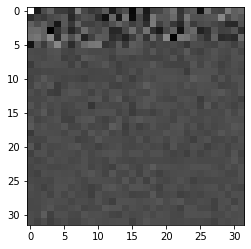

In [180]:
plt.imshow(seat[0,:,:],'gray')

In [181]:
def make_combine(dataset):
    arr = np.zeros((1,2,32,32))
    for img1,img2 in combinations(dataset,2):
        temp = np.concatenate((img1,img2),axis=0)
        temp = temp.reshape((1,2,32,32))
        arr = np.concatenate((arr,temp))

    arr = arr[1:,:,:,:]
    return arr.copy()

stone_stone_x = make_combine(stone)
canvas_canvas_x = make_combine(canvas)
cushion_cushion_x = make_combine(cushion)
linsseeds_linsseeds_x = make_combine(linsseeds)
sand_sand_x = make_combine(sand)
seat_seat_x = make_combine(seat)
print(seat_seat_x.shape)


(45, 2, 32, 32)


In [182]:
def make_product(dataset1,datset2):
    arr = np.zeros((1,2,32,32))
    for img1,img2 in product(dataset1,datset2):
        temp = np.concatenate((img1,img2),axis=0)
        temp = temp.reshape((1,2,32,32))
        arr = np.concatenate((arr,temp))

    arr = arr[1:,:,:,:]
    return arr.copy()
stone_canvas_x = make_product(stone,canvas)
stone_cushion_x = make_product(stone,cushion)
stone_linsseeds_x = make_product(stone,linsseeds)
stone_sand_x = make_product(stone,sand)
stone_seat_x = make_product(stone,seat)

canvas_sand_x = make_product(canvas,sand)
canvas_cushion_x = make_product(canvas,cushion)
canvas_linsseeds_x = make_product(canvas,linsseeds)
canvas_seat_x = make_product(canvas,seat)

cushion_linsseeds_x = make_product(cushion,linsseeds)
cushion_sand_x = make_product(cushion,sand)
cushion_seat_x = make_product(cushion,seat)

linsseeds_sand_x = make_product(linsseeds,sand)
linsseeds_seat_x = make_product(linsseeds,seat)

sand_seat_x = make_product(sand,seat)

print(stone_canvas_x.shape)

(100, 2, 32, 32)


In [183]:
stone_canvas_y = np.zeros((stone_canvas_x.shape[0],))
stone_cushion_y = np.zeros((stone_cushion_x.shape[0],))
stone_linsseeds_y = np.zeros((stone_linsseeds_x.shape[0],))
stone_sand_y = np.zeros((stone_sand_x.shape[0],))
stone_seat_y = np.zeros((stone_seat_x.shape[0],))

canvas_sand_y = np.zeros((canvas_sand_x.shape[0],))
canvas_cushion_y = np.zeros((canvas_cushion_x.shape[0],))
canvas_linsseeds_y = np.zeros((canvas_linsseeds_x.shape[0],))
canvas_seat_y = np.zeros((canvas_seat_x.shape[0],))

cushion_linsseeds_y = np.zeros((cushion_linsseeds_x.shape[0],))
cushion_sand_y = np.zeros((cushion_sand_x.shape[0],))
cushion_seat_y = np.zeros((cushion_seat_x.shape[0],))

linsseeds_sand_y = np.zeros((linsseeds_sand_x.shape[0],))
linsseeds_seat_y = np.zeros((linsseeds_seat_x.shape[0],))

sand_seat_y = np.zeros((sand_seat_x.shape[0],))


In [184]:
stone_stone_y = np.ones((stone_stone_x.shape[0],))
canvas_canvas_y = np.ones((canvas_canvas_x.shape[0],))
cushion_cushion_y = np.ones((cushion_cushion_x.shape[0],))
linsseeds_linsseeds_y = np.ones((linsseeds_linsseeds_x.shape[0],))
sand_sand_y = np.ones((sand_sand_x.shape[0],))
seat_seat_y = np.ones((seat_seat_x.shape[0],))

In [185]:
full_data = np.concatenate([stone_canvas_x,stone_stone_x,stone_cushion_x,stone_linsseeds_x,stone_sand_x,stone_seat_x,canvas_canvas_x,canvas_cushion_x,canvas_linsseeds_x,canvas_sand_x,canvas_seat_x,linsseeds_linsseeds_x,linsseeds_sand_x,linsseeds_seat_x,cushion_linsseeds_x,cushion_cushion_x,cushion_sand_x,cushion_seat_x,sand_sand_x,sand_seat_x,seat_seat_x],axis=0)

In [186]:
full_data.shape

(1770, 2, 32, 32)

In [187]:
full_label = np.concatenate([stone_canvas_y,stone_stone_y,stone_cushion_y,stone_linsseeds_y,stone_sand_y,stone_seat_y,canvas_canvas_y,canvas_cushion_y,canvas_linsseeds_y,canvas_sand_y,canvas_seat_y,linsseeds_linsseeds_y,linsseeds_sand_y,linsseeds_seat_y,cushion_linsseeds_y,cushion_cushion_y,cushion_sand_y,cushion_seat_y,sand_sand_y,sand_seat_y,seat_seat_y],axis=0)

In [188]:
full_label.shape

(1770,)

In [189]:
full_data = full_data.reshape((full_data.shape[0],full_data.shape[1]*full_data.shape[2]*full_data.shape[3]))
full_data.shape

(1770, 2048)

In [190]:
y_pred = nn_clf.predict(full_data)

print('Classifier accuracy is {0} '.format(accuracy_score(full_label, y_pred)))


Classifier accuracy is 0.6700564971751413 


### PCA undergoing

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=32)

In [ ]:
pca.fit(full_data)

PCA(n_components=32)

In [ ]:
full_data = pca.transform(full_data)

In [ ]:
full_data.shape

(16110, 32)